## Zadanie A

In [8]:
using Roots  
using Plots
using ForwardDiff
using DataFrames

Selected functions:

In [40]:
f1(x) = 2 * x - exp(-x)
f2(x) = (x + 3) * (x - 1)^2
f3(x) = sin(x) - x / 2
f4(x) = exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3
# f4(x) = cos(x) - x
f5(x) = (x-1)^7
f6(x) = x^3 - 2*x - 5

f6 (generic function with 1 method)

Selected methods: Bisection, Newtons, Secant

### Task 1.

In [41]:
funs = [f1, f2, f3, f4, f5, f6]

6-element Vector{Function}:
 f1 (generic function with 1 method)
 f2 (generic function with 1 method)
 f3 (generic function with 1 method)
 f4 (generic function with 1 method)
 f5 (generic function with 1 method)
 f6 (generic function with 1 method)

In [33]:
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [37]:
ds(f, x) = sign(f(prevfloat(x))) != sign(f(nextfloat(x)))

ds (generic function with 1 method)

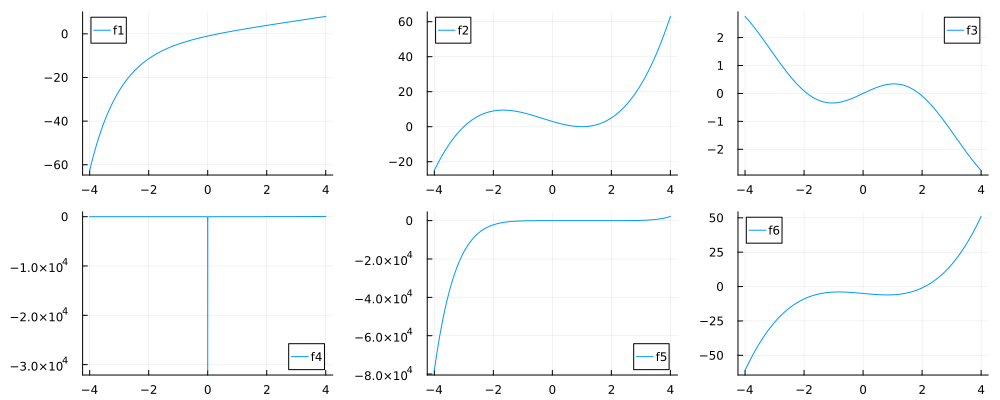

In [58]:
plot(layout = 6, size=(1000,400))
for s in 1:6
    plot!(funs[s], -4, 4, subplot=s, label="f$s")
end
plot!()

In [53]:
tracker = Roots.Tracks()
df = DataFrame(method=String[], fun=String[], iterations=Int64[], calls=Int64[], iszero=Bool[], differentsigns=Bool[], value=Float64[], x=Float64[])
for f in funs
    x = find_zero(f, (-4, 4), Bisection(), tracks=tracker)
    push!(df, ["Bisection", "$f", tracker.steps, tracker.fncalls, iszero(f(x)), ds(f, x), f(x), x])
    empty!(tracker)
    
    try
        x = find_zero((f, D(f)), 0, Roots.Newton(), tracks=tracker)
    catch
        x = NaN
    end
    push!(df, ["Newton", "$f", tracker.steps, tracker.fncalls, iszero(f(x)), ds(f, x), f(x), x])
    empty!(tracker)
    
    x = find_zero(f, 0, Order1(), tracks=tracker)
    push!(df, ["Secant", "$f", tracker.steps, tracker.fncalls, iszero(f(x)), ds(f, x), f(x), x])
    empty!(tracker)
end
df

Row,method,fun,iterations,calls,iszero,differentsigns,value,x
,String,String,Int64,Int64,Bool,Bool,Float64,Float64
1,Bisection,f1,62,65,true,true,0.0,0.351734
2,Newton,f1,4,8,false,true,-1.11022e-16,0.351734
3,Secant,f1,5,7,false,false,-2.22045e-16,0.351734
4,Bisection,f2,61,64,true,true,0.0,-3.0
5,Newton,f2,26,52,false,false,4.56496e-16,1.0
6,Secant,f2,37,39,false,false,5.18739e-16,1.0
7,Bisection,f3,0,3,true,true,0.0,0.0
8,Newton,f3,1,2,true,true,0.0,0.0
9,Secant,f3,0,2,true,true,0.0,0.0


### Task 2.

In [68]:
f = f1
println("Bisection:")
x1 = find_zero(f, (-4, 4), Bisection(), verbose=true)

println("Newton:")
x2 = find_zero((f, D(f)), 0, Roots.Newton(), verbose=true)

println("Secant:")
x3 = find_zero(f, 0, Order1(), verbose=true)

Bisection:


Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Bisection()
* iterations: 62
* function evaluations ≈ 65
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( 0, 4 )
(a₁, b₁) = ( 2.237502219360062e-154, 4 )
(a₂, b₂) = ( 3.0226589942830556e-77, 4 )
(a₃, b₃) = ( 1.1020259538958945e-38, 4 )
(a₄, b₄) = ( 2.1006417091906648e-19, 4 )
(a₅, b₅) = ( 9.1677065938711166e-10, 4 )
(a₆, b₆) = ( 6.0558319091796875e-05, 4 )
(a₇, b₇) = ( 0.01556396484375, 4 )
(a₈, b₈) = ( 0.24951171875, 4 )
(a₉, b₉) = ( 0.24951171875, 0.9990234375 )
(a₁₀, b₁₀) = ( 0.24951171875, 0.499267578125 )
(a₁₁, b₁₁) = ( 0.24951171875, 0.3741455078125 )
(a₁₂, b₁₂) = ( 0.31158447265625, 0.3741455078125 )
(a₁₃, b₁₃) = ( 0.342864990234375, 0.3741455078125 )
(a₁₄, b₁₄) = ( 0.342864990234375, 0.3585052490234375 )
(a₁₅, b₁₅) = ( 0.35068511962890625, 0.3585052490234375 )
(a₁₆, b₁₆) = ( 0.35068511962890625, 0.35459518432617188 )
(a₁₇, b₁₇) = ( 0.35068511962890625, 0.35264015197

Newton:


Results of univariate zero finding:

* Converged to: 0.3517337112491958
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 0.33333333333333331,	 fx₂ = -0.049864643907122641
x₃ = 0.35168933155541537,	 fx₃ = -0.00011997974912580922
x₄ = 0.35173371099294265,	 fx₄ = -6.9277206193874008e-10
x₅ = 0.35173371124919578,	 fx₅ = -1.1102230246251565e-16



Secant:


Results of univariate zero finding:

* Converged to: 0.3517337112491957
* Algorithm: Secant()
* iterations: 5
* function evaluations ≈ 7
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -0.99998183365497706
x₂ = 0,	 fx₂ = -1
x₃ = 0.33333366974734885,	 fx₃ = -0.049863730027956632
x₄ = 0.35082722371724301,	 fx₄ = -0.0024509486253887491
x₅ = 0.35173153265646406,	 fx₅ = -5.8897561466819681e-06
x₆ = 0.35173371099220896,	 fx₆ = -6.9475558639453538e-10
x₇ = 0.35173371124919572,	 fx₇ = -2.2204460492503131e-16



0.3517337112491957

In [69]:
println(iszero(f(x1)), " ", iszero(f(x2)), " ", iszero(f(x3)))
(x1, x2, x3)

true false false


(0.35173371124919584, 0.3517337112491958, 0.3517337112491957)

### Task 3.

In [79]:
println("Bisection:")
try
    find_zero(f2, (-2, 2), Bisection(), verbose=true)
catch e
    println(e.msg)
end

println("Newton:")
try
    find_zero((f4, D(f4)), 0, Roots.Newton(), verbose=true)
catch e
    try
        println(e.msg)
    catch
        println(e)
    end
end

println("\nSecant:")
try
    find_zero(f1, 0, Order1(), verbose=true)
catch e
    println(e.msg)
end

Bisection:
The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.


Newton:


Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 0,	 fx₁ = NaN
x₂ = NaN,	 fx₂ = NaN



Roots.ConvergenceFailed("Algorithm failed to converge")

Secant:


Results of univariate zero finding:

* Converged to: 0.3517337112491957
* Algorithm: Secant()
* iterations: 5
* function evaluations ≈ 7
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -0.99998183365497706
x₂ = 0,	 fx₂ = -1
x₃ = 0.33333366974734885,	 fx₃ = -0.049863730027956632
x₄ = 0.35082722371724301,	 fx₄ = -0.0024509486253887491
x₅ = 0.35173153265646406,	 fx₅ = -5.8897561466819681e-06
x₆ = 0.35173371099220896,	 fx₆ = -6.9475558639453538e-10
x₇ = 0.35173371124919572,	 fx₇ = -2.2204460492503131e-16



0.3517337112491957